In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('hotel_bookings 2.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [103]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,July


In [5]:
df.shape

(119390, 32)

In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-'*70)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------
is_canceled
[0 1]
----------------------------------------------------------------------
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310

### Data Cleaning and Preprocessing

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
missingdata = pd.DataFrame((df.isnull().sum()/df.shape[0])*100).reset_index()
missingdata

,index,0
0,hotel,0.000000
1,is_canceled,0.000000
2,lead_time,0.000000
3,arrival_date_year,0.000000
4,arrival_date_month,0.000000
5,arrival_date_week_number,0.000000
6,arrival_date_day_of_month,0.000000
7,stays_in_weekend_nights,0.000000
8,stays_in_week_nights,0.000000
9,adults,0.000000


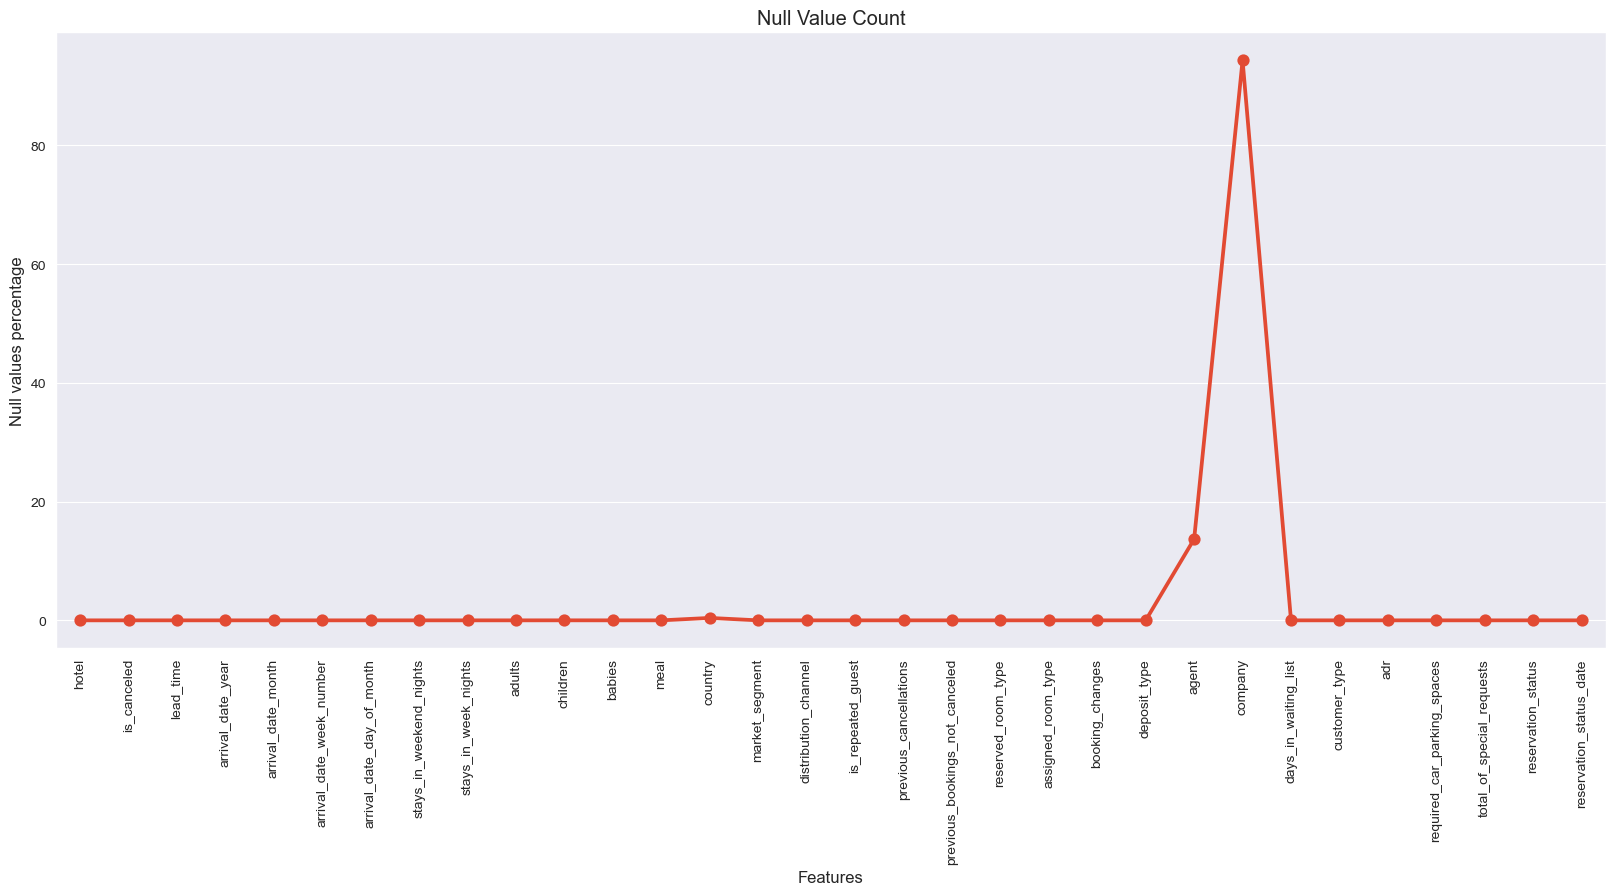

In [14]:
plt.figure(figsize=(20,8))
sns.pointplot(data=missingdata,x='index',y=0)
plt.title('Null Value Count')
plt.xlabel('Features')
plt.ylabel('Null values percentage')
plt.xticks(rotation=90)
plt.show()

In [5]:
df1 = df.copy()  ## for backup purpose 

##### I'll drop the agent and company column because it has a significant amount of null data and i dont think that these 2 columns has a great impact on our target column "is_canceled"

In [6]:
df.drop(['agent','company'],axis=1,inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 

In [9]:
df.reservation_status_date = pd.to_datetime(df.reservation_status_date, format='%d/%m/%Y')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64     

In [26]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


In [27]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


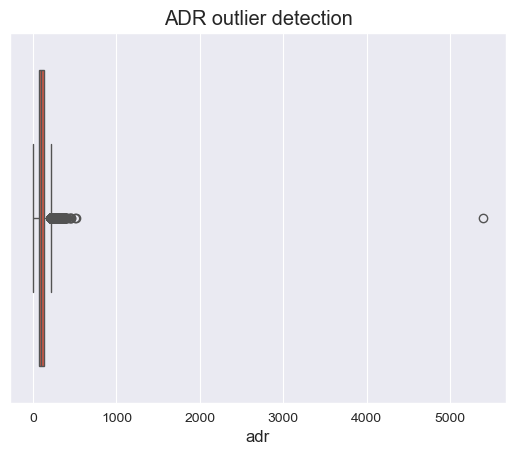

In [29]:
sns.boxplot(data=df, x='adr')
plt.title('ADR outlier detection')
plt.show()

##### From the above boxplot, we can see that there is one major outlier data point

#### Outlier treatment

In [10]:
df = df[df.adr<5000]

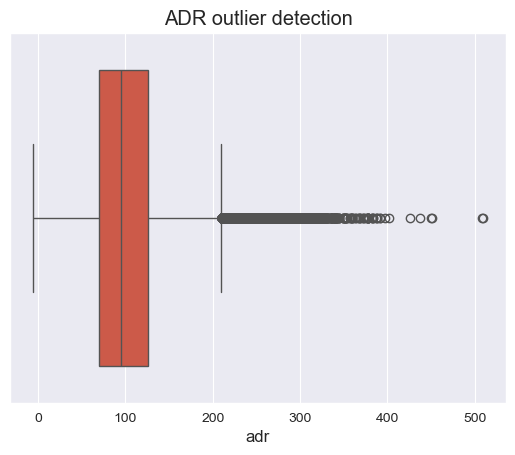

In [17]:
sns.boxplot(data=df, x='adr')
plt.title('ADR outlier detection')
plt.show()

##### Still there are some outliers but lets keep them for now

### EDA

In [33]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [35]:
cancelPct = round(df.is_canceled.value_counts(normalize=True)*100,2)
cancelPct

is_canceled
0    62.87
1    37.13
Name: proportion, dtype: float64

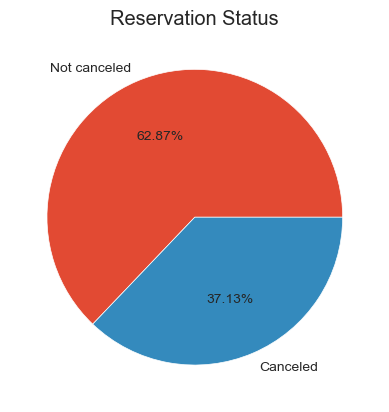

In [39]:
plt.pie(cancelPct, labels=['Not canceled','Canceled'], autopct='%0.2f%%')
plt.title('Reservation Status')
plt.show()

##### The number of reservations with the status "canceled" is lower than those with the status "not canceled."

In [44]:
hotelPct = df.hotel.value_counts()
hotelPct

hotel
City Hotel      79301
Resort Hotel    39596
Name: count, dtype: int64

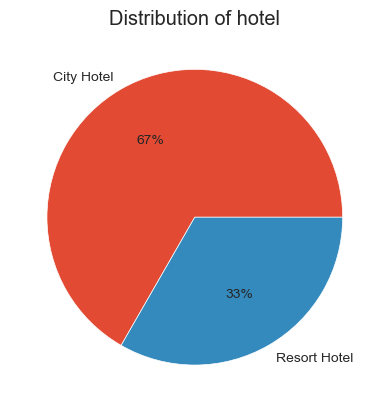

In [45]:
plt.pie(hotelPct, labels=hotelPct.index, autopct='%0.0f%%')
plt.title('Distribution of hotel')
plt.show()

##### In this dataset, the distribution of bookings for city hotels is significantly higher compared to resort hotels.

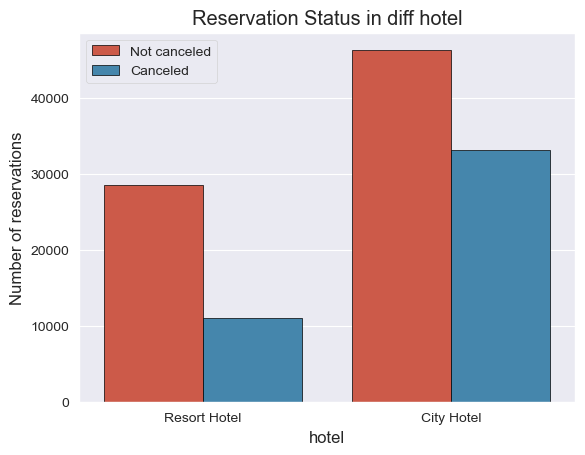

In [46]:
sns.countplot(data=df, x='hotel',hue='is_canceled', edgecolor='k')
plt.legend(labels=['Not canceled','Canceled'],title=None)
plt.ylabel('Number of reservations')
plt.title('Reservation Status in diff hotel')
plt.show()

##### As we can see from above, the cancellation rate is higher for city hotels compared to resort hotels.

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [63]:
cityHotel = df[df.hotel == 'City Hotel']
cityHotel.is_canceled.value_counts(normalize=True)*100

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

In [65]:
resortHotel = df[df.hotel == 'Resort Hotel']
resortHotel.is_canceled.value_counts(normalize=True)*100

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [67]:
city_hotel = cityHotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel = resortHotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


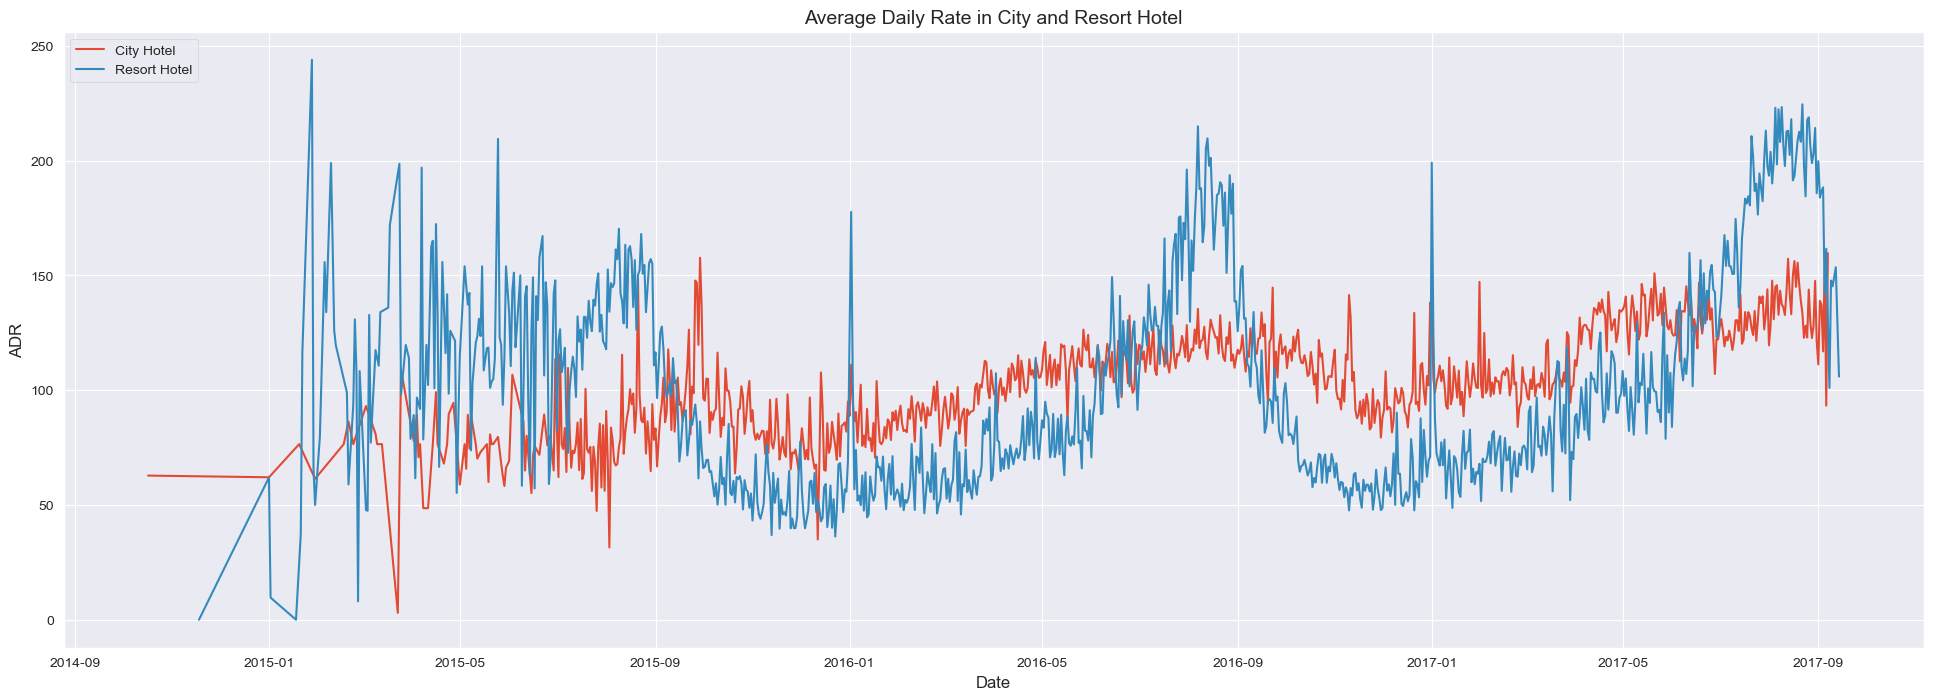

In [76]:
plt.figure(figsize=(24,8))
plt.plot(city_hotel.index, city_hotel.adr)
plt.plot(resort_hotel.index, resort_hotel.adr)
plt.title('Average Daily Rate in City and Resort Hotel',size=14)
plt.xlabel('Date')
plt.ylabel('ADR')
plt.legend(labels=['City Hotel','Resort Hotel'],title=None, loc='upper left')
plt.show()

##### Resort hotels command higher ADR then city hotels, with both showing seasonal peaks during summer months (Jul-Aug).

In [11]:
df['month'] =df.reservation_status_date.dt.month_name()

In [60]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,July


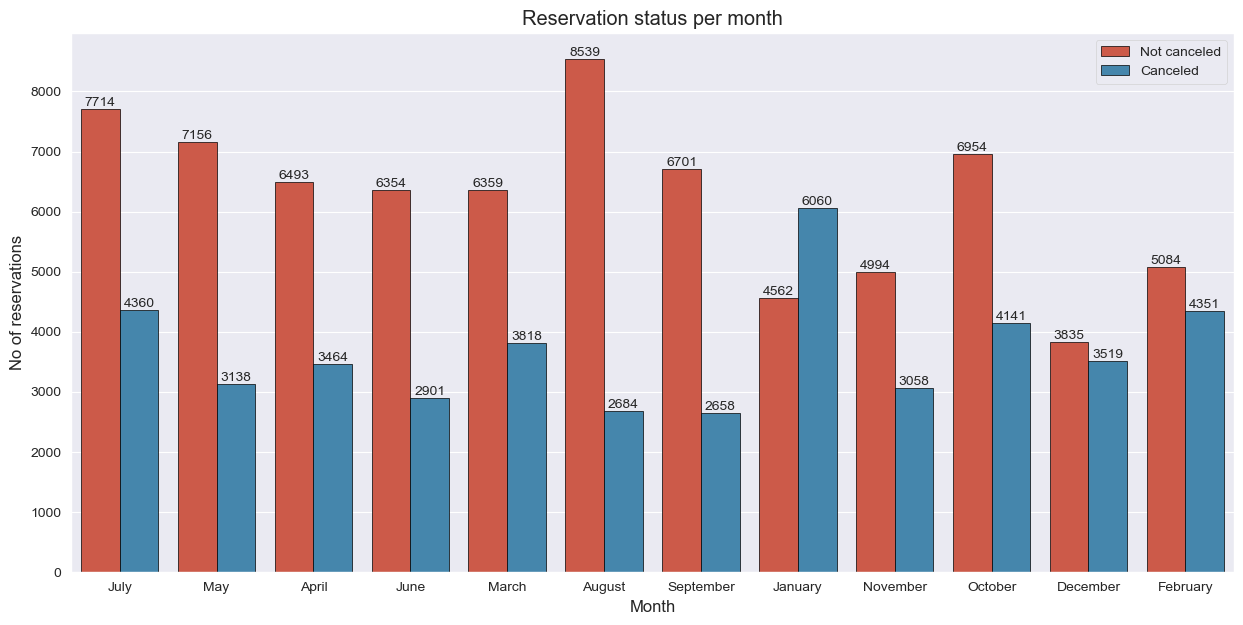

In [61]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df, x='month', hue='is_canceled', edgecolor='k')
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(labels=['Not canceled','Canceled'],title=None)
plt.xlabel('Month')
plt.ylabel('No of reservations')
plt.title('Reservation status per month')
plt.show()

##### Cancelation rate in January and July are higher

In [28]:
df['year'] = df.reservation_status_date.dt.year

In [31]:
yr = df.groupby('year')['is_canceled'].mean()
yr

year
2014    1.000000
2015    0.461058
2016    0.372045
2017    0.306004
Name: is_canceled, dtype: float64

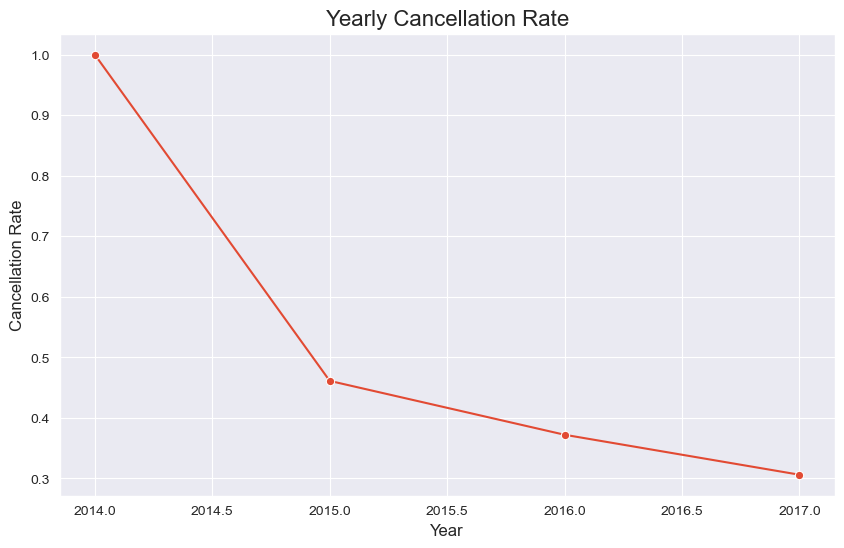

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=yr.index, y=yr.values, marker='o')
plt.title('Yearly Cancellation Rate', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)
plt.show()

##### The line plot shows a declining trend in the cancellation rate from 2014 to 2017, indicating that cancellations decreased steadily over the years.

In [89]:
country = round(df[df.is_canceled==1]['country'].value_counts(normalize=True)*100,2)
topTenCountry=country.sort_values(ascending=False).head(10)
topTenCountry

country
PRT    62.32
GBR     5.56
ESP     4.93
FRA     4.38
ITA     3.02
DEU     2.76
IRL     1.88
BRA     1.88
USA     1.13
BEL     1.07
Name: proportion, dtype: float64

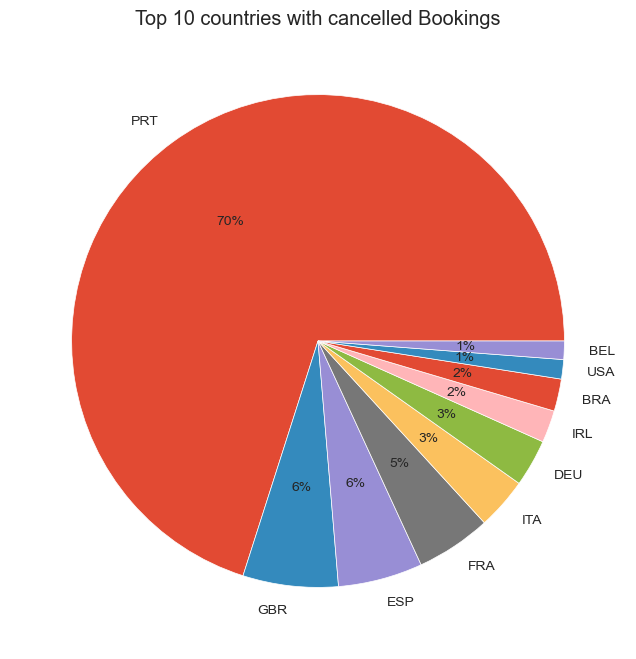

In [92]:
plt.figure(figsize=(8,8))
plt.pie(topTenCountry, labels=topTenCountry.index, autopct="%0.0f%%")
plt.title('Top 10 countries with cancelled Bookings')
plt.show()

##### Portugal has the highest number of canceled bookings.

In [93]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

In [98]:
market = round(df[df.is_canceled==1][['market_segment']].value_counts(normalize=True)*100,2).reset_index()
market

,market_segment,proportion
0,Online TA,46.97
1,Groups,27.40
2,Offline TA/TO,18.75
3,Direct,4.35
4,Corporate,2.22
5,Complementary,0.20
6,Aviation,0.12


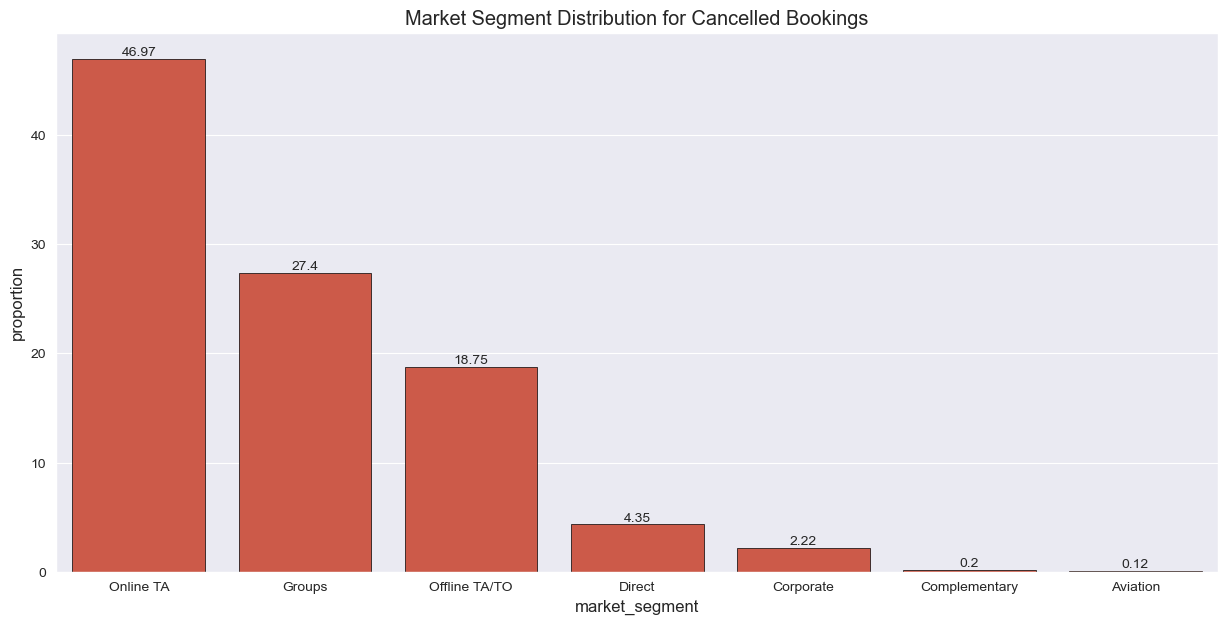

In [100]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=market, x='market_segment', y='proportion', edgecolor='k')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Market Segment Distribution for Cancelled Bookings')
plt.show()

##### Market segments such as Online Travel Agents (OTA), groups, and Offline Travel Agents/Operators have higher cancellation rates.

In [104]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,July


### Feature engineering

In [12]:
df['family_size'] = df.adults + df.children + df.babies

In [13]:
def family_categorize(size):
    if size == 1:
        return "Single"
    elif size <=3:
        return "Small Family"
    else :
        return "Large Family"
df['family_categorize'] = df.family_size.apply(family_categorize)

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month,family_size,family_categorize
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July,2.0,Small Family
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July,2.0,Small Family
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July,1.0,Single
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July,1.0,Single
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,July,2.0,Small Family


In [32]:
round(df.family_categorize.value_counts(normalize=True)*100,2)

family_categorize
Small Family    77.82
Single          18.75
Large Family     3.43
Name: proportion, dtype: float64

In [33]:
fam = round(df.groupby('family_categorize')['is_canceled'].mean(),2)*100
fam

family_categorize
Large Family    42.0
Single          29.0
Small Family    39.0
Name: is_canceled, dtype: float64

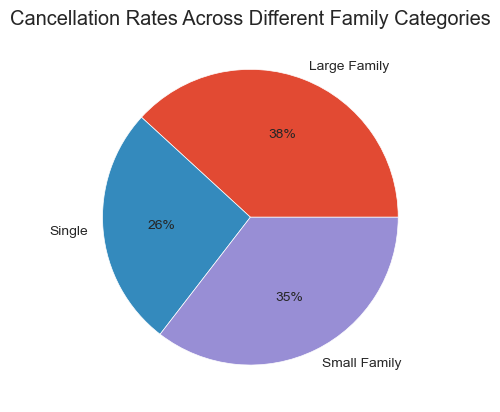

In [34]:
plt.pie(fam,labels=fam.index, autopct='%0.0f%%')
plt.title('Cancellation Rates Across Different Family Categories')
plt.show()

##### Large families have the highest cancellation rate (38%), while single travelers cancel the least (26%).

In [35]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month', 'family_size',
       'family_categorize'],
      dtype='object')

In [36]:
df.lead_time.unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99,  95,  96,  69,  45,
        40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,  76,
         3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81, 368,
       364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,  86,
        52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,  34,
        27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,  67,
        55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,  22,
        91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58, 116,
        42, 321,  38, 118,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [37]:
df.lead_time.max()

737

In [15]:
bins= list(range(0,738,61))
bins

[0, 61, 122, 183, 244, 305, 366, 427, 488, 549, 610, 671, 732]

In [16]:
bins = []
max_value = 737
for i in range(0,737,61):
    bins.append(i)
print(bins)
if bins[-1] < max_value:
    bins.pop()
    bins.append(max_value)
print("Final bins : ",bins)

[0, 61, 122, 183, 244, 305, 366, 427, 488, 549, 610, 671, 732]
Final bins :  [0, 61, 122, 183, 244, 305, 366, 427, 488, 549, 610, 671, 737]


In [17]:
labels = []
for i in range(len(bins)-1):
    labels.append('{}-{}'.format(bins[i],bins[i+1]))
labels

['0-61',
 '61-122',
 '122-183',
 '183-244',
 '244-305',
 '305-366',
 '366-427',
 '427-488',
 '488-549',
 '549-610',
 '610-671',
 '671-737']

In [18]:
df['lead_time_category'] = pd.cut(df.lead_time, bins=bins, labels=labels)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month,family_size,family_categorize,lead_time_category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July,2.0,Small Family,305-366
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July,2.0,Small Family,671-737
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July,1.0,Single,0-61
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July,1.0,Single,0-61
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,July,2.0,Small Family,0-61


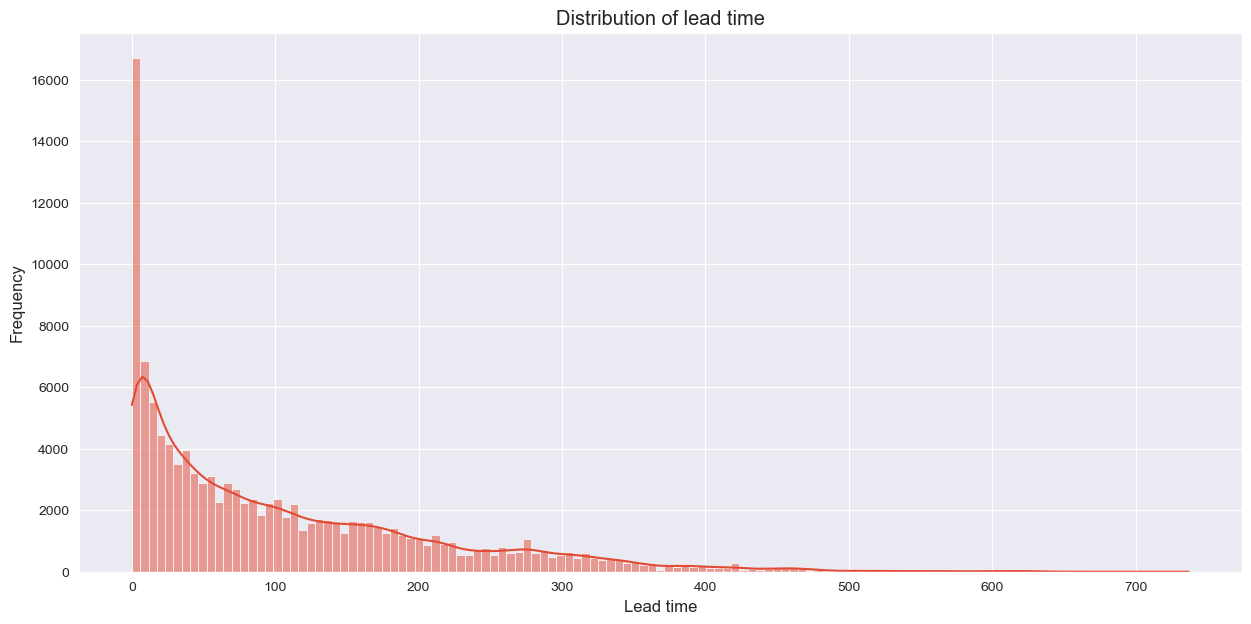

In [57]:
plt.figure(figsize=(15,7))
sns.histplot(df.lead_time,kde=True)
plt.title('Distribution of lead time')
plt.xlabel('Lead time')
plt.ylabel('Frequency')
plt.show()

In [69]:
canc = df.groupby('lead_time_category')['is_canceled'].mean().reset_index()
canc

,lead_time_category,is_canceled
0,0-61,0.264943
1,61-122,0.415990
2,122-183,0.454602
3,183-244,0.461171
4,244-305,0.616896
5,305-366,0.674645
6,366-427,0.600696
7,427-488,0.708333
8,488-549,0.750000
9,549-610,1.000000


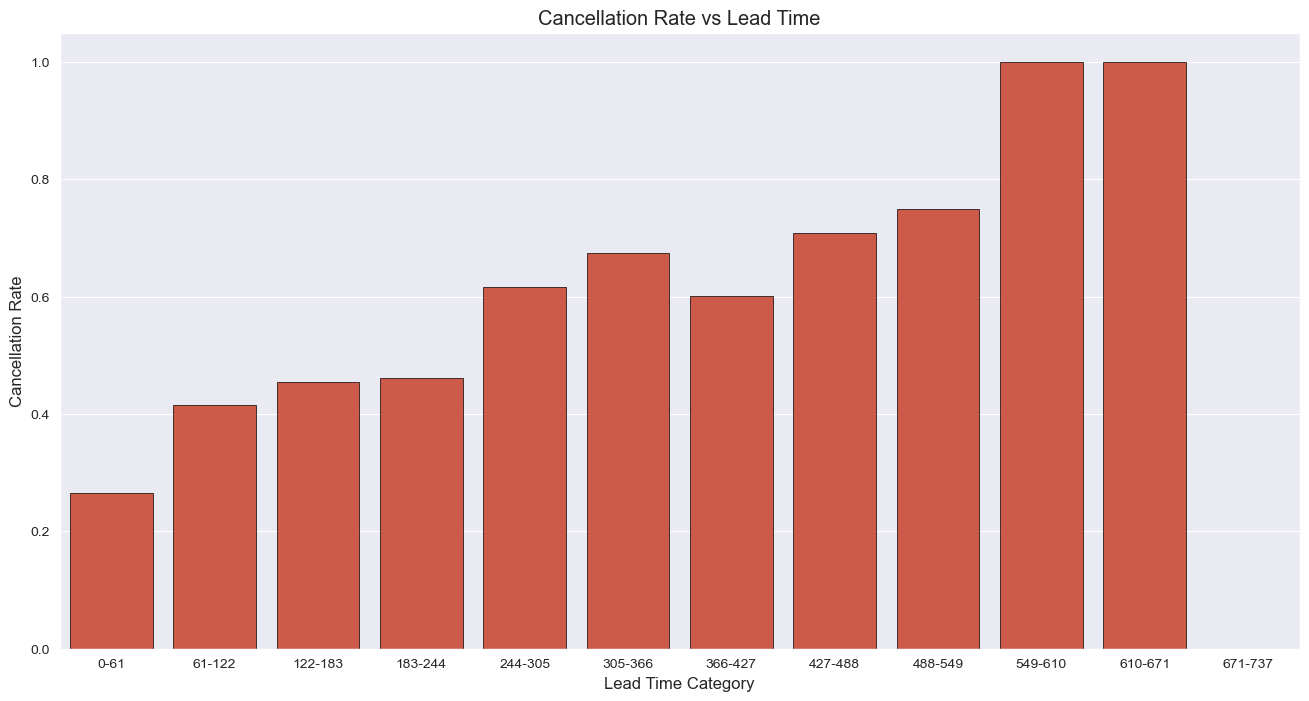

In [80]:
plt.figure(figsize=(16,8))
sns.barplot(x='lead_time_category', y='is_canceled', data=canc, edgecolor='k')
plt.title('Cancellation Rate vs Lead Time')
plt.ylabel('Cancellation Rate')
plt.xlabel('Lead Time Category')
plt.show()

##### As expected, a longer lead time increases the likelihood of cancellation.

In [65]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month,family_size,family_categorize,lead_time_category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July,2.0,Small Family,305-366
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July,2.0,Small Family,671-737
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July,1.0,Single,0-61
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July,1.0,Single,0-61
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,July,2.0,Small Family,0-61


In [104]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month', 'family_size',
       'family_categorize', 'lead_time_category'],
      dtype='object')

In [105]:
rg = df.groupby('is_repeated_guest')['is_canceled'].mean().reset_index()
rg

,is_repeated_guest,is_canceled
0,0,0.378831
1,1,0.145034


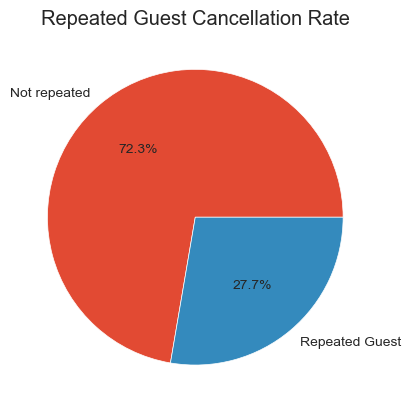

In [108]:
plt.pie(rg.is_canceled, labels=['Not repeated','Repeated Guest'], autopct='%0.1f%%')
plt.title('Repeated Guest Cancellation Rate')
plt.show()

##### As expected, repeated guest has low cancellation rate

In [116]:
prev= df.groupby('previous_cancellations')['is_canceled'].mean().reset_index()

In [117]:
prev

,previous_cancellations,is_canceled
0,0,0.340009
1,1,0.945820
2,2,0.327434
3,3,0.307692
4,4,0.225806
5,5,0.105263
6,6,0.318182
7,11,0.285714
8,13,0.916667
9,14,1.000000


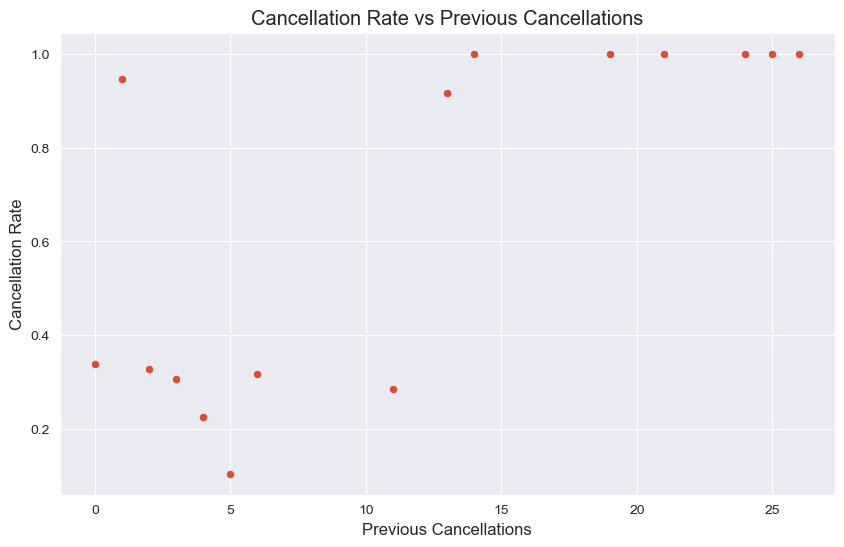

In [118]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=prev, x='previous_cancellations', y='is_canceled')
plt.title('Cancellation Rate vs Previous Cancellations')
plt.xlabel('Previous Cancellations')
plt.ylabel('Cancellation Rate')
plt.show()

##### As the number of previous cancellations increases, the likelihood of a booking being canceled also increases, 
##### with guests having multiple previous cancellations showing a near 100% cancellation rate.

In [119]:
prev_notCanceled = df.groupby('previous_bookings_not_canceled')['is_canceled'].mean().reset_index()
prev_notCanceled

,previous_bookings_not_canceled,is_canceled
0,0,0.380649
1,1,0.051653
2,2,0.054104
3,3,0.046512
4,4,0.047847
...,...,...
68,68,0.000000
69,69,0.000000
70,70,0.000000
71,71,0.000000


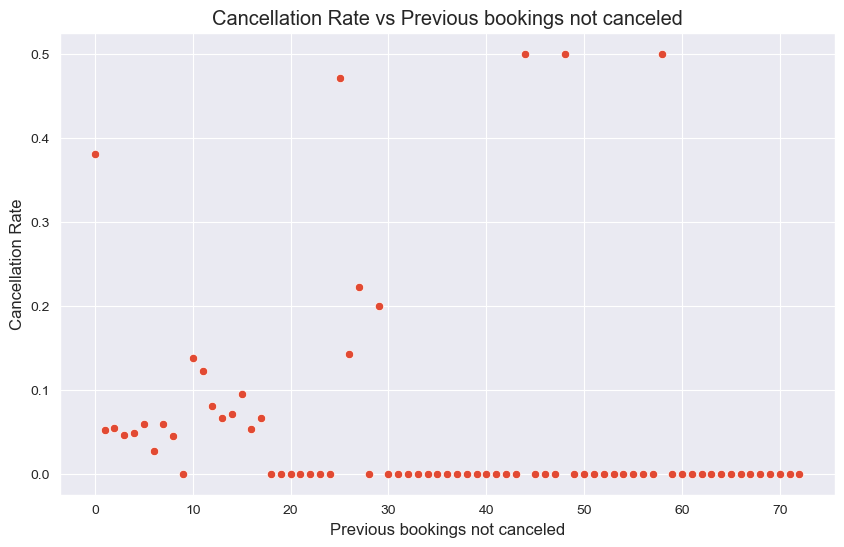

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=prev_notCanceled, x='previous_bookings_not_canceled', y='is_canceled')
plt.title('Cancellation Rate vs Previous bookings not canceled')
plt.xlabel('Previous bookings not canceled')
plt.ylabel('Cancellation Rate')
plt.show()

##### As the number of previous bookings not canceled increases, the cancellation rate significantly decreases, 
##### with guests having a higher number of prior successful bookings showing minimal cancellations.

In [124]:
cus_type = round(df.groupby('customer_type')['is_canceled'].mean(),2).reset_index()
cus_type

,customer_type,is_canceled
0,Contract,0.31
1,Group,0.10
2,Transient,0.41
3,Transient-Party,0.25


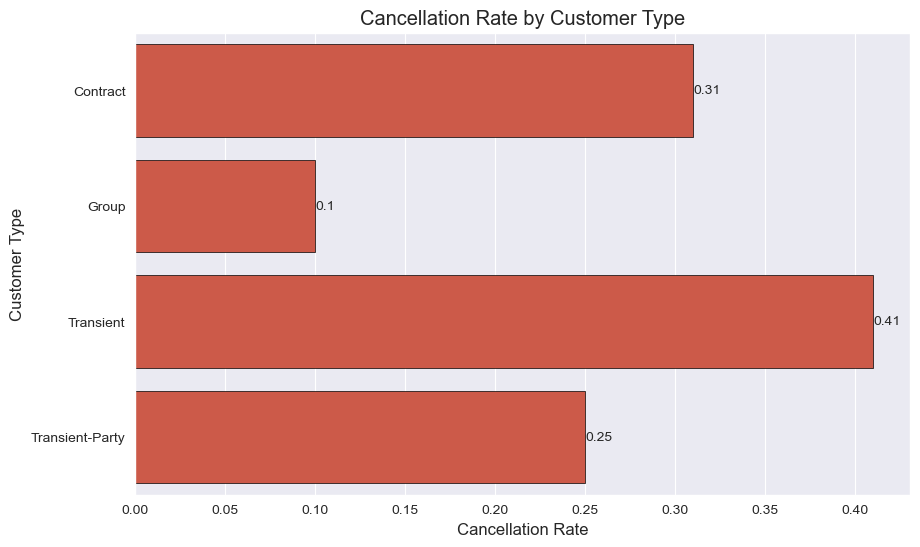

In [126]:
plt.figure(figsize=(10, 6))
s=sns.barplot(data=cus_type, x='is_canceled', y='customer_type', edgecolor='k')
for bars in s.containers:
    s.bar_label(bars)
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Cancellation Rate')
plt.ylabel('Customer Type')
plt.show()

##### The "Transient" user type has the highest cancellation rate, followed by the "Contract" user type.

In [136]:
channel = round(df.groupby('distribution_channel')['is_canceled'].mean(),2).reset_index()
channel = channel[channel!='Undefined']
channel.dropna(inplace=True)
channel

,distribution_channel,is_canceled
0,Corporate,0.22
1,Direct,0.18
2,GDS,0.19
3,TA/TO,0.41


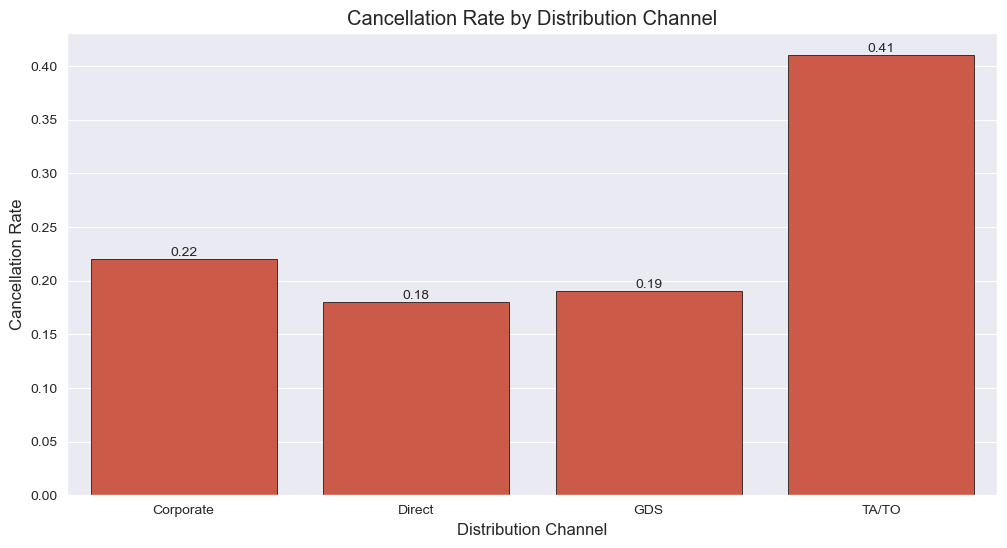

In [137]:
plt.figure(figsize=(12,6))
c = sns.barplot(data=channel, x='distribution_channel', y='is_canceled', edgecolor='k')
for bars in c.containers:
    c.bar_label(bars)
plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.show()

##### The "TA/TO" distribution channel has the highest cancellation rate.

In [141]:
meal = round(df.groupby('meal')['is_canceled'].mean(),2).reset_index()
meal = meal[meal != 'Undefined']
meal.dropna(inplace=True)
meal

,meal,is_canceled
0,BB,0.38
1,FB,0.60
2,HB,0.35
3,SC,0.37


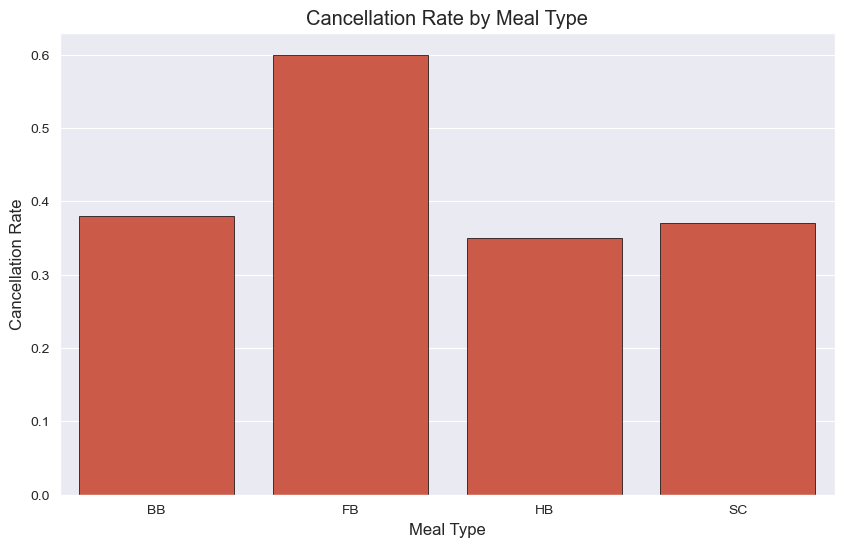

In [143]:
plt.figure(figsize=(10,6))
sns.barplot(data=meal, x='meal', y='is_canceled', edgecolor ='k')
plt.title('Cancellation Rate by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Cancellation Rate')
plt.show()

##### Bookings with Full Board (FB) meal preference tend to have the highest cancellation rate

In [144]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month', 'family_size',
       'family_categorize', 'lead_time_category'],
      dtype='object')

In [146]:
waiting = round(df.groupby('days_in_waiting_list')['is_canceled'].mean(),2).reset_index()
waiting

,days_in_waiting_list,is_canceled
0,0,0.36
1,1,0.25
2,2,0.20
3,3,1.00
4,4,0.32
...,...,...
123,236,0.17
124,259,0.00
125,330,0.07
126,379,0.60


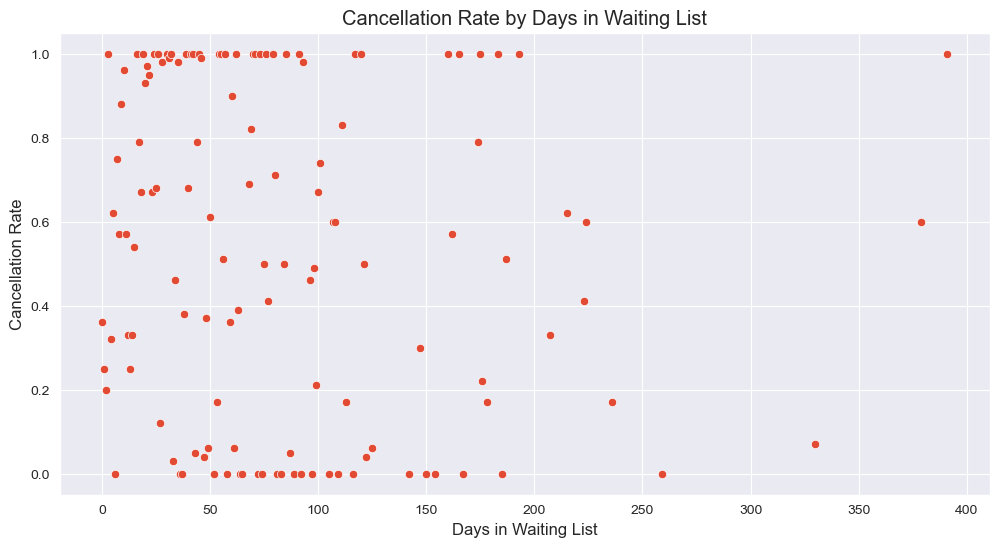

In [151]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=waiting, x='days_in_waiting_list', y='is_canceled')
plt.title('Cancellation Rate by Days in Waiting List')
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation Rate')
plt.show()

##### Bookings with a longer duration in the waiting list tend to have a higher cancellation rate

In [19]:
df['booking_changes_category'] = pd.cut(df.booking_changes, bins=[-1, 0, 5, 10, 15, 100], labels=['0', '1-5', '6-10', '11-15', '15+'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month,family_size,family_categorize,lead_time_category,booking_changes_category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July,2.0,Small Family,305-366,1-5
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,July,2.0,Small Family,671-737,1-5
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July,1.0,Single,0-61,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,July,1.0,Single,0-61,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,July,2.0,Small Family,0-61,0


In [158]:
book_cat = round(df.groupby('booking_changes_category')['is_canceled'].mean(),2).reset_index()
book_cat

,booking_changes_category,is_canceled
0,0,0.41
1,1-5,0.16
2,6-10,0.22
3,11-15,0.06
4,15+,0.14


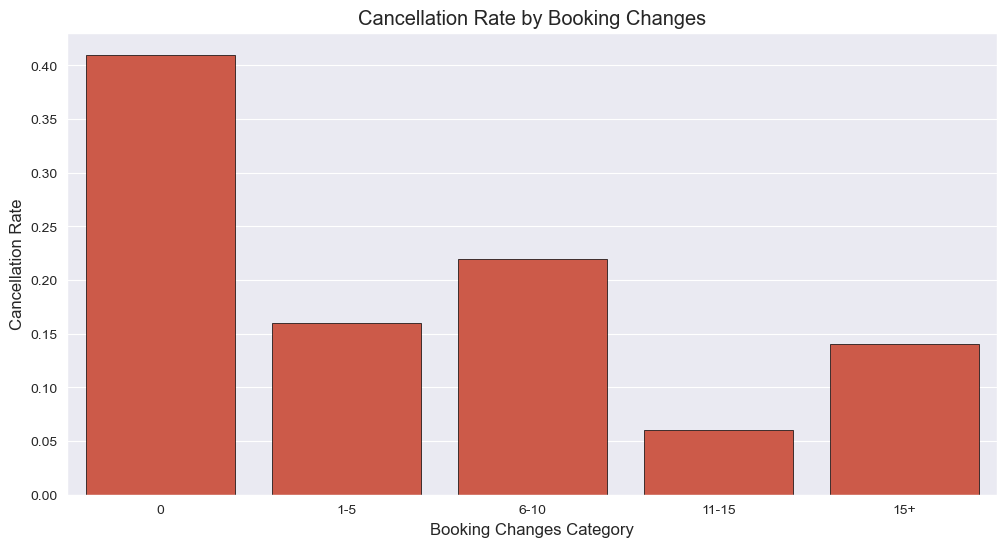

In [161]:
plt.figure(figsize=(12,6))
sns.barplot(data=book_cat, x='booking_changes_category', y='is_canceled',edgecolor='k')
plt.title('Cancellation Rate by Booking Changes')
plt.xlabel('Booking Changes Category')
plt.ylabel('Cancellation Rate')
plt.show()

##### Bookings with no changes (0) have the highest cancellation rate at around 40%, while subsequent change categories 
##### show a varying but generally lower cancellation pattern.

In [162]:
dep = round(df.groupby('deposit_type')['is_canceled'].mean(),2).reset_index()
dep

,deposit_type,is_canceled
0,No Deposit,0.28
1,Non Refund,0.99
2,Refundable,0.22


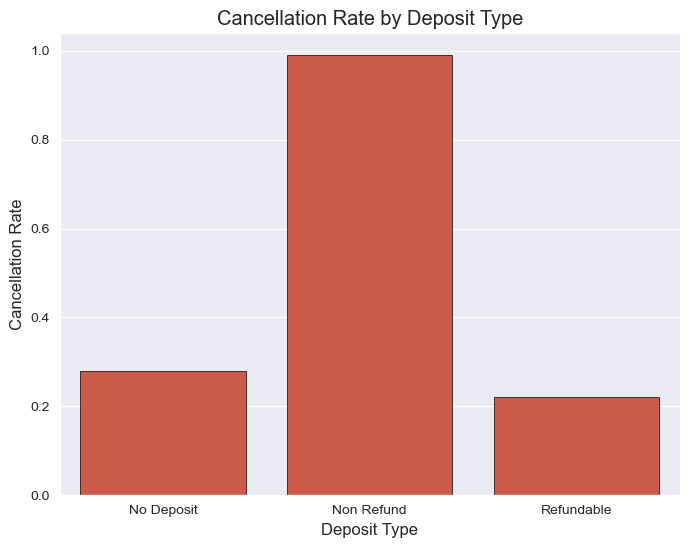

In [165]:
plt.figure(figsize=(8,6))
sns.barplot(data=dep, x='deposit_type', y='is_canceled', edgecolor='k')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.show()

##### As expected, non-refundable bookings have a higher cancellation rate.

In [166]:
room = round(df.groupby('reserved_room_type')['is_canceled'].mean(),2).reset_index()
room

,reserved_room_type,is_canceled
0,A,0.39
1,B,0.33
2,C,0.33
3,D,0.32
4,E,0.29
5,F,0.30
6,G,0.37
7,H,0.41
8,L,0.33
9,P,1.00


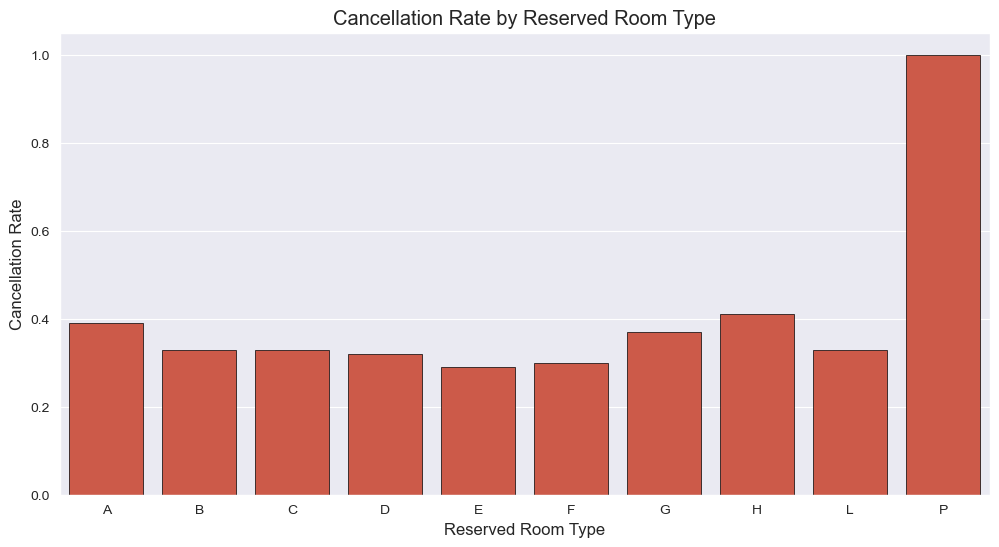

In [178]:
plt.figure(figsize=(12,6))
sns.barplot(data=room, x='reserved_room_type', y='is_canceled', edgecolor='k')
plt.title('Cancellation Rate by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Cancellation Rate')
plt.show()

##### The reserved room type "P" has a higher cancellation rate.

In [168]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month', 'family_size',
       'family_categorize', 'lead_time_category', 'booking_changes_category'],
      dtype='object')

In [180]:
car = df.groupby('required_car_parking_spaces')['is_canceled'].mean().reset_index()
car

,required_car_parking_spaces,is_canceled
0,0,0.395673
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,8,0.000000


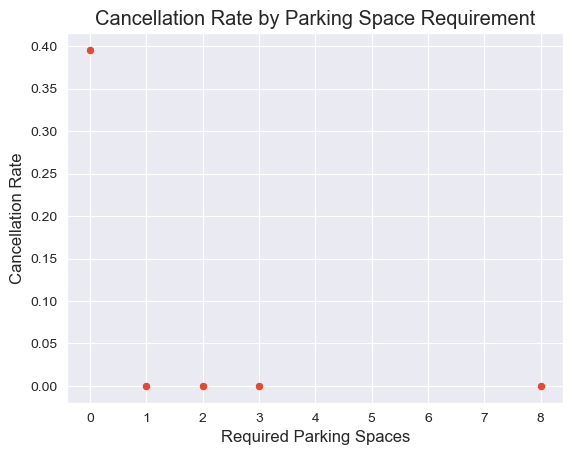

In [181]:
sns.scatterplot(data=cancellation_by_parking, x='required_car_parking_spaces', y='is_canceled')
plt.title('Cancellation Rate by Parking Space Requirement')
plt.xlabel('Required Parking Spaces')
plt.ylabel('Cancellation Rate')
plt.show()

##### Bookings with no parking requirements show the highest cancellation rate, while those needing parking rarely cancel.

In [177]:
special = df.groupby('total_of_special_requests')['is_canceled'].mean().reset_index()
special

,total_of_special_requests,is_canceled
0,0,0.478640
1,1,0.220766
2,2,0.221251
3,3,0.178528
4,4,0.106195
5,5,0.026316


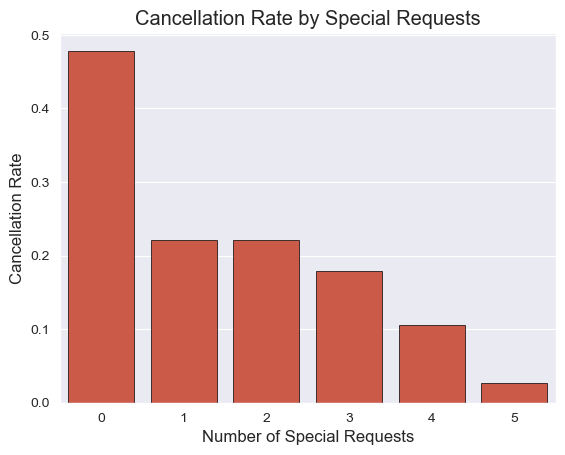

In [179]:
sns.barplot(data=special, x='total_of_special_requests', y='is_canceled', edgecolor='k')
plt.title('Cancellation Rate by Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate')
plt.show()

##### Bookings with more special requests tend to have lower cancellation rates

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64     

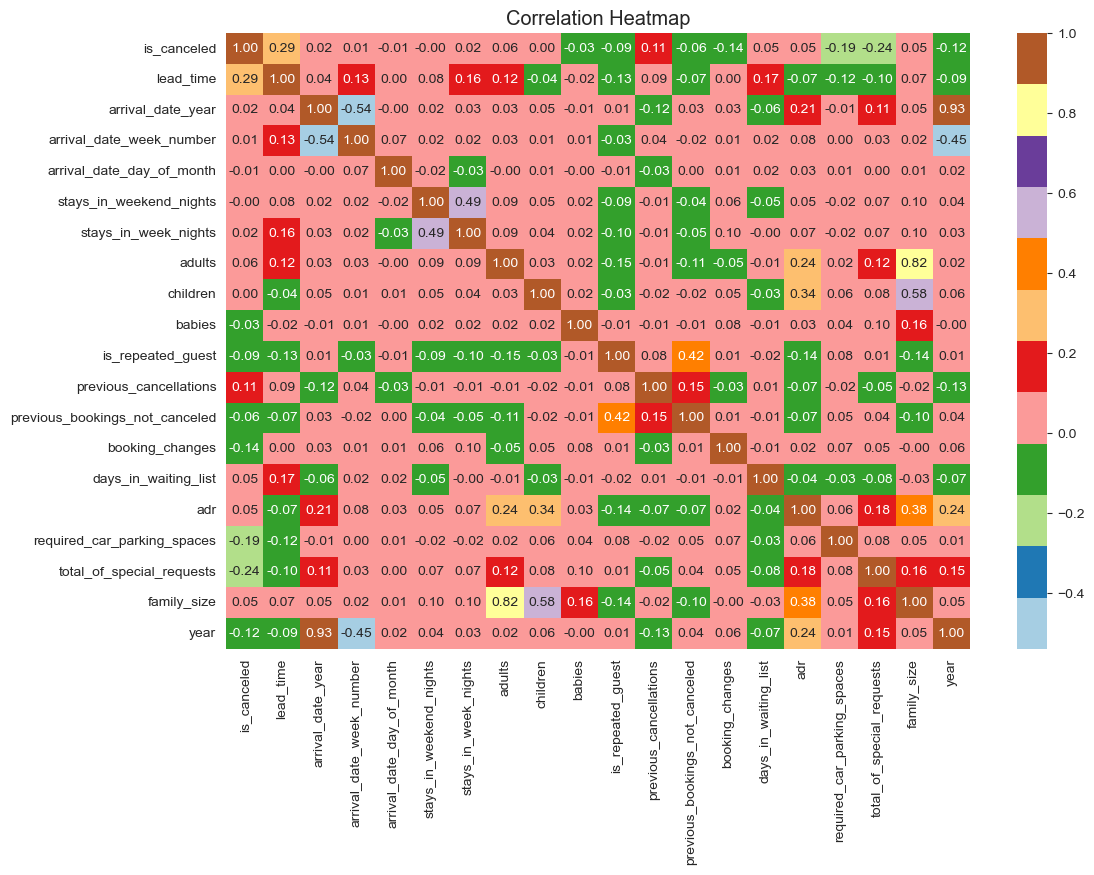

In [35]:
numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric.corr(), annot=True, fmt='.2f', cmap='Paired')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
df.to_csv('first_hotel.csv')

## Final Conclusions

#### Booking Status Distribution
##### - The number of reservations with the status "not canceled" is higher than those with the status "canceled."

#### Hotel Type Analysis
##### - The distribution of bookings for city hotels is significantly higher compared to resort hotels.
##### - Cancellation rates are higher for city hotels compared to resort hotels.
##### - Resort hotels command higher Average Daily Rates (ADR) than city hotels, with both showing seasonal peaks during summer months (July-August).

#### Monthly and Country Trends
##### - Cancellation rates are notably higher in January and July.
##### - Portugal has the highest number of canceled bookings.

#### Yearly Trend:
##### - There is a declining trend in the cancellation rate from 2014 to 2017, with cancellations steadily decreasing over the years. 
##### - This insight could indicate changes in customer behavior, booking policies, or improved retention efforts during this period.

#### Market Segment Insights
##### - Market segments such as Online Travel Agents (OTA), groups, and Offline Travel Agents/Operators have higher cancellation rates.

#### Family and Traveler Type Analysis
##### - Large families have the highest cancellation rate (38%), while single travelers cancel the least (26%).
##### - "Transient" user type has the highest cancellation rate, followed by the "Contract" user type.

#### Lead Time and Repeated Guests
##### - A longer lead time increases the likelihood of cancellation.
##### - Repeated guests have a lower cancellation rate.

#### Historical Booking Behavior
##### - Guests with multiple previous cancellations show a near 100% likelihood of canceling bookings.
##### - Guests with a higher number of previous successful bookings rarely cancel their reservations.

#### Distribution Channels
##### - The "TA/TO" distribution channel has the highest cancellation rate.

#### Meal Preference Analysis
##### - Bookings with a Full Board (FB) meal preference tend to have the highest cancellation rate.

#### Waiting List Duration
##### - Bookings with a longer duration in the waiting list tend to have a higher cancellation rate.

#### Booking Changes
##### - Bookings with no changes (0) have the highest cancellation rate at around 40%.
##### - Categories with more booking changes show a varying but generally lower cancellation pattern.

#### Deposit Type Analysis
##### - Non-refundable bookings have a higher cancellation rate.

#### Room Type Insights
##### - The reserved room type "P" has the highest cancellation rate.

#### Parking and Special Requests
##### - Bookings with no parking requirements show the highest cancellation rate, while those needing parking rarely cancel.
##### - Bookings with more special requests tend to have significantly lower cancellation rates.
